### Convolutional Neural Networks

Hanyang U. 2023

Dates: 2023-3-30

Author: Yung-Kyun Noh

Department of Computer Science, Hanyang University / School of Computational Sciences, KIAS


In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras

import numpy as np

import matplotlib.pyplot as plt

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train, y_test)

11501568/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 ... 5 6 8] [7 2 1 ... 4 5 6]


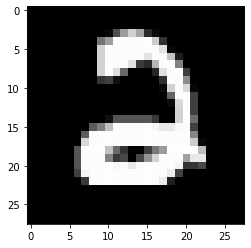

In [4]:
plt.imshow(x_train[82], cmap='gray')


In [5]:
# flatten (vectorize) for ANN
x_train_flatten = x_train.reshape(60000, 784)
x_test_flatten = x_test.reshape(10000, 784)

num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

print(y_train.shape, '\n', y_train[0])    # one-hot coding

(60000, 10) 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### ANN

In [6]:
model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_categories, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
# number of the parameters in each layer
print('1st layer:', (784 + 1)*512)  # 1: bias
print('2nd layer:', (512 + 1)*512)
print('3rd layer:', (512 + 1)*10)


1st layer: 401920
2nd layer: 262656
3rd layer: 5130


In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_flatten, y_train,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test_flatten, y_test))


Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 1.8659 - accuracy: 0.8914 - val_loss: 0.4673 - val_accuracy: 0.9409
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5017 - accuracy: 0.9329 - val_loss: 0.4255 - val_accuracy: 0.9262
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4049 - accuracy: 0.9424 - val_loss: 0.3682 - val_accuracy: 0.9508
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3916 - accuracy: 0.9443 - val_loss: 0.4649 - val_accuracy: 0.9555
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3718 - accuracy: 0.9487 - val_loss: 0.4836 - val_accuracy: 0.9487


### Convolutional Neural Networks

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

In [10]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(units=num_categories, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 flatten (Flatten)           (None, 58800)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                588010    
                                                                 
Total params: 588,760
Trainable params: 588,760
Non-trainable params: 0
_________________________________________________________________


In [11]:
# number of the parameters in each layer
print('1st layer:', (3*3 + 1)*75)  # 1: bias
print('3rd layer:', (58800 + 1)*10)


1st layer: 750
3rd layer: 588010


In [12]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

x_train_conv = x_train.reshape(-1,28,28,1)
x_test_conv = x_test.reshape(-1,28,28,1)

model.fit(x_train_conv, y_train, epochs=5, verbose=1, validation_data=(x_test_conv, y_test))


Epoch 1/5
1875/1875 [==============================] - 9s 3ms/step - loss: 1.0185 - accuracy: 0.9506 - val_loss: 0.1091 - val_accuracy: 0.9714
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0955 - accuracy: 0.9740 - val_loss: 0.1021 - val_accuracy: 0.9723
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0922 - accuracy: 0.9749 - val_loss: 0.1210 - val_accuracy: 0.9711
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0925 - accuracy: 0.9752 - val_loss: 0.1139 - val_accuracy: 0.9716
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0915 - accuracy: 0.9758 - val_loss: 0.1353 - val_accuracy: 0.9663


### Deep Convolutional Neural Networks

In [13]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_categories, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)      

In [14]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

x_train_conv = x_train.reshape(-1,28,28,1)
x_test_conv = x_test.reshape(-1,28,28,1)

model.fit(x_train_conv, y_train, epochs=20, verbose=1, validation_data=(x_test_conv, y_test))


Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1395 - accuracy: 0.9600 - val_loss: 0.0507 - val_accuracy: 0.9862
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0653 - accuracy: 0.9832 - val_loss: 0.0425 - val_accuracy: 0.9877
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0522 - accuracy: 0.9871 - val_loss: 0.0652 - val_accuracy: 0.9822
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0477 - accuracy: 0.9887 - val_loss: 0.0430 - val_accuracy: 0.9892
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0403 - accuracy: 0.9906 - val_loss: 0.0374 - val_accuracy: 0.9910
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0376 - accuracy: 0.9911 - val_loss: 0.0343 - val_accuracy: 0.9915
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0337 - accuracy: 0.9924 - val_loss: 0.0348 - val_accur

### Data augmentation

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

batch_size = 32
img_iter = datagen.flow(x_train_conv, y_train, batch_size=batch_size)

In [16]:
model.fit(img_iter, steps_per_epoch=1000, verbose=1, validation_data=(x_test_conv, y_test), epochs=20)

Epoch 1/20
1000/1000 [==============================] - 9s 8ms/step - loss: 0.1147 - accuracy: 0.9724 - val_loss: 0.0488 - val_accuracy: 0.9896
Epoch 2/20
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0717 - accuracy: 0.9794 - val_loss: 0.0523 - val_accuracy: 0.9903
Epoch 3/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0637 - accuracy: 0.9820 - val_loss: 0.0301 - val_accuracy: 0.9921
Epoch 4/20
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0612 - accuracy: 0.9833 - val_loss: 0.0279 - val_accuracy: 0.9926
Epoch 5/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0575 - accuracy: 0.9830 - val_loss: 0.0296 - val_accuracy: 0.9914
Epoch 6/20
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0531 - accuracy: 0.9847 - val_loss: 0.0257 - val_accuracy: 0.9927
Epoch 7/20
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0532 - accuracy: 0.9855 - val_loss: 0.0332 - val_accuracy:

In [17]:
model.fit(x_train_conv, y_train, epochs=10, verbose=1, validation_data=(x_test_conv, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0204 - accuracy: 0.9943 - val_loss: 0.0198 - val_accuracy: 0.9941
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0170 - accuracy: 0.9955 - val_loss: 0.0220 - val_accuracy: 0.9945
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.0266 - val_accuracy: 0.9937
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0132 - accuracy: 0.9964 - val_loss: 0.0266 - val_accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0128 - accuracy: 0.9968 - val_loss: 0.0209 - val_accuracy: 0.9946
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 0.0274 - val_accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.0234 - val_accuracy:

(3, 3, 1, 75)


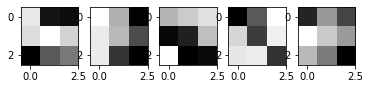

In [18]:
# show the first five filters
filters, biases = model.layers[0].get_weights()
print(filters.shape)
plt.subplot(151)
plt.imshow(filters[:,:,0,0], cmap='gray')
plt.subplot(152)
plt.imshow(filters[:,:,0,1], cmap='gray')
plt.subplot(153)
plt.imshow(filters[:,:,0,2], cmap='gray')
plt.subplot(154)
plt.imshow(filters[:,:,0,3], cmap='gray')
plt.subplot(155)
plt.imshow(filters[:,:,0,4], cmap='gray')
plt.show()


In [19]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}